In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import time
import os
import random
import copy
import numpy as np
import torchvision.models as models

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)


In [17]:
model_ft = models.vgg16(pretrained=False)
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs, 10)

model_ft.load_state_dict(torch.load('data/vgg16_v3.model'))
model_ft = model_ft.cpu()
print(model_ft)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

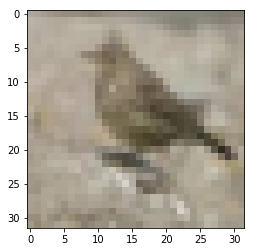

In [18]:
import data_reader
train_X, train_y, test_X, test_y = data_reader.get_data_array('cifar-10', 'data/cifar-10-batches-py')

img = train_X[120]

import matplotlib.pyplot as plt
% matplotlib inline
plt.figure('origin')
plt.imshow(img / 255.)
plt.show()

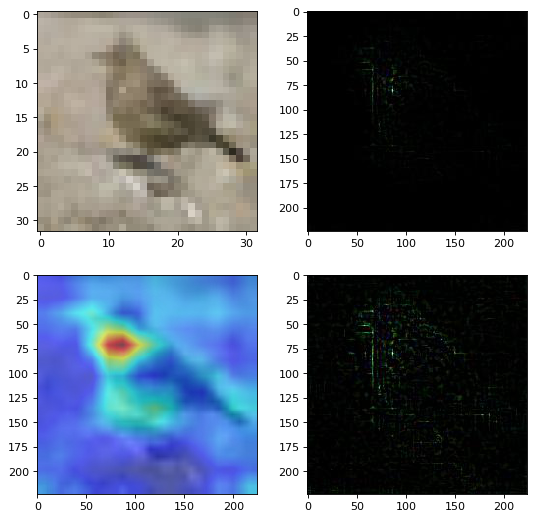

In [19]:
from gradCAM import cam_img
import cv2
# cam_img(img, model=model_ft, target_layer_names=['27'])
cam_img(img)

cam = cv2.imread('cam.jpg')
cam = cv2.cvtColor(cam, cv2.COLOR_BGR2RGB)
cam_gb = cv2.imread('cam_gb.jpg')
cam_gb = cv2.cvtColor(cam_gb, cv2.COLOR_BGR2RGB)
gb = cv2.imread('gb.jpg')
gb = cv2.cvtColor(gb, cv2.COLOR_BGR2RGB)

plt.figure('img',figsize=(8,8),dpi=80)
plt.subplot(221)
plt.imshow(img / 255.)
plt.subplot(223)
plt.imshow(cam)
plt.subplot(222)
plt.imshow(cam_gb)
plt.subplot(224)
plt.imshow(gb)
# plt.show()
plt.savefig('data/gradCAM_res/vgg16_pretrained_29')